# Question 1 : Requête SQL
Ecrivez une requête SQL permettant d’extraire dans une nouvelle table la somme des 3
premiers achats des personnes s’étant inscrit à Angers entre le 01/03/2023 et le 10/03/2023.
Cette nouvelle table devra avoir les colonnes suivantes :
- ca : la somme des 3 premiers achats de l’individu.
- birth_date : la date de naissance de l’individu.
- account_id : l’ID de l’individu.
- zip_code : le code postal de l’individu lors de son inscription.
- register_ts : le timestamp d’inscription de l’individu.
Seules les personnes ayant fait au moins 3 achats devront être listé dans cette table.

#here for sql
#create a bbd
CREATE TABLE IF NOT EXISTS somme_3_premiers_achats (
   ca INTEGER,
   birth_date DATE,
   account_id INTEGER,
   zip_code STRING,
   register_ts INTEGER,
);
INSERT INTO somme_3_premiers_achats (
  ca,
  birth_date,
  account_id,
  zip_code,
  register_ts,
)

#for select

SELECT 
  u.birth_date,
  p.account_id,
  u.zip_code,
  u.register_ts,
  SUM(p.amount) AS ca
FROM 
  users u
  INNER JOIN purchases p ON u.account_id = p.account_id
WHERE 
  u.zip_code = '49000'
  AND u.register_ts >= UNIX_TIMESTAMP('2023-03-01 00:00:00')
  AND u.register_ts <= UNIX_TIMESTAMP('2023-03-10 23:59:59')
GROUP BY 
  p.account_id
HAVING 
  COUNT(*) >= 3
ORDER BY 
  ca DESC
LIMIT 100;

# Question 2 : Exploration et visualisation des données
Le résultat de votre requête SQL a été exporté dans le fichier "df.csv"
1. Lisez le fichier "df.csv" et créez la colonne age, l’âge des individus au 31 Mars 2023.
2. Explorez et analysez brièvement le jeu de donnée.
3. Afficher sur un graphique les dépenses des individus par rapport à leur âge. Avez-vous
une première intuition de réponse à la question de Julie ?

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('df.csv')
df.head

<bound method NDFrame.head of        ca  birth_date  account_id  zip_code  register_ts  age (solution)
0    1100  2000-03-26      246379     49100   1677865798       23.027397
1    4583  1985-02-01      202279     49100   1677705136       38.183562
2    6064  1987-10-03      237416     49000   1678116904       35.515068
3    1331  1998-08-29      201983     49100   1677931680       24.602740
4    5509  1989-04-04      209024     49000   1678355334       34.010959
..    ...         ...         ...       ...          ...             ...
447  4924  1988-01-18      219062     49000   1678335591       35.221918
448  3663  1989-11-01      239117     49100   1678423918       33.432877
449  5902  1986-01-23      229561     49100   1677872472       37.208219
450  4226  2000-10-27      225960     49000   1678322716       22.438356
451  3617  1993-03-28      237709     49100   1678154673       30.027397

[452 rows x 6 columns]>

In [3]:
from datetime import datetime,date

def calculate_age(born):
    today = date.today()
    age = today.year - born.year - ((today.month, today.day) < (born.month, born.day))
    return age

In [4]:
df['age'] = df['birth_date'].apply(lambda x : calculate_age(datetime.strptime(x, '%Y-%m-%d')))
df

,ca,birth_date,account_id,zip_code,register_ts,age (solution),age
0,1100,2000-03-26,246379,49100,1677865798,23.027397,23
1,4583,1985-02-01,202279,49100,1677705136,38.183562,38
2,6064,1987-10-03,237416,49000,1678116904,35.515068,35
3,1331,1998-08-29,201983,49100,1677931680,24.602740,24
4,5509,1989-04-04,209024,49000,1678355334,34.010959,34
...,...,...,...,...,...,...,...
447,4924,1988-01-18,219062,49000,1678335591,35.221918,35
448,3663,1989-11-01,239117,49100,1678423918,33.432877,33
449,5902,1986-01-23,229561,49100,1677872472,37.208219,37
450,4226,2000-10-27,225960,49000,1678322716,22.438356,22


Le plus important dans cet ensemble de données est l'âge "age" et le dépensé "ca".

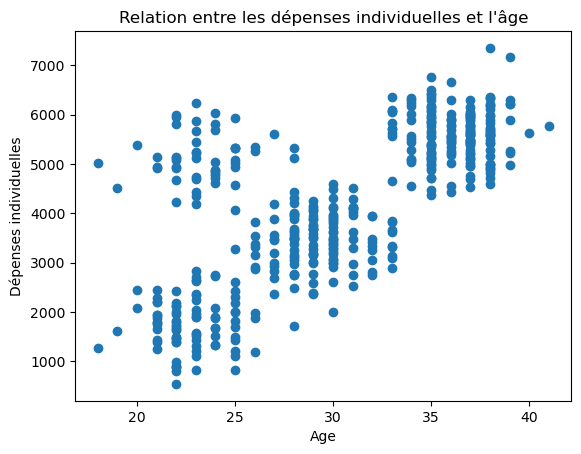

In [5]:
import matplotlib.pyplot as plt
plt.scatter(df['age'], df['ca'])
plt.xlabel('Age')
plt.ylabel('Dépenses individuelles')
plt.title('Relation entre les dépenses individuelles et l\'âge')
plt.show()

Il existe deux groupes de consommateurs dans la tranche d'âge 20-25 ans. 
La majorité de ces groupes de consommateurs se situe entre 1000 et 3000 (groupe de faible consommation). 
L'autre partie du niveau de consommation est plus élevée, entre 4000 et 6200.
Les 25-30 ans ont un niveau de consommation de 2000-5000.
Au-delà de 35 ans Le niveau de consommation est plus élevé, au-dessus de 4 000, 
avec davantage de groupes entre 4 000 et 7 000.

# Le test qui a permis de savoir si Julie avait réussi

In [6]:
df_25 = df[df['age'] < 25]
df_25

,ca,birth_date,account_id,zip_code,register_ts,age (solution),age
0,1100,2000-03-26,246379,49100,1677865798,23.027397,23
3,1331,1998-08-29,201983,49100,1677931680,24.602740,24
11,2115,2001-01-18,214580,49000,1678356714,22.210959,22
22,2370,1999-07-14,228613,49100,1678187888,23.728767,23
28,818,1999-08-04,219555,49100,1677742579,23.671233,23
...,...,...,...,...,...,...,...
436,1786,2001-03-12,229212,49000,1677892845,22.065753,22
439,1217,1999-06-28,206092,49000,1678038588,23.772603,23
442,2445,2002-04-10,200840,49000,1677738911,20.986301,21
446,6228,2000-02-13,232569,49100,1678189964,23.142466,23


In [12]:
df_25['register_t'] = df_25['register_ts'].apply(lambda x : pd.to_datetime(x, unit='s')).dt.date
df_sorted = df_25.sort_values(by='register_ts')
df_sorted.groupby('register_t')
df_sorted

C:\Users\xingc\AppData\Local\Temp\ipykernel_17764\4083127189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_25['register_t'] = df_25['register_ts'].apply(lambda x : pd.to_datetime(x, unit='s')).dt.date


,ca,birth_date,account_id,zip_code,register_ts,age (solution),age,register_t
203,2032,1999-11-27,226752,49000,1677686633,23.356164,23,2023-03-01
199,5009,2004-08-04,249734,49000,1677720470,18.665753,18,2023-03-02
189,2199,2001-08-09,237113,49100,1677724753,21.654795,21,2023-03-02
442,2445,2002-04-10,200840,49000,1677738911,20.986301,21,2023-03-02
28,818,1999-08-04,219555,49100,1677742579,23.671233,23,2023-03-02
...,...,...,...,...,...,...,...,...
166,1572,2000-04-05,236647,49100,1678458893,23.000000,23,2023-03-10
118,1491,2000-10-28,242029,49100,1678465032,22.435616,22,2023-03-10
61,540,2001-03-17,200596,49000,1678468537,22.052055,22,2023-03-10
280,1479,2000-07-15,238194,49000,1678469493,22.723288,22,2023-03-10


In [13]:
df_25['register_t'] = df_25['register_ts'].apply(lambda x : pd.to_datetime(x, unit='s')).dt.date
df_sorted = df_25.sort_values(by='register_ts')
df_eachday = df_sorted.groupby(['register_t']).agg({"ca":"mean"})
df_eachday

C:\Users\xingc\AppData\Local\Temp\ipykernel_17764\96640447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_25['register_t'] = df_25['register_ts'].apply(lambda x : pd.to_datetime(x, unit='s')).dt.date


,ca
register_t,
2023-03-01,2032.000000
2023-03-02,2990.111111
2023-03-03,2518.545455
2023-03-04,2276.272727
2023-03-05,3029.750000
2023-03-06,2818.111111
2023-03-07,3791.500000
2023-03-08,2538.000000
2023-03-09,3388.166667


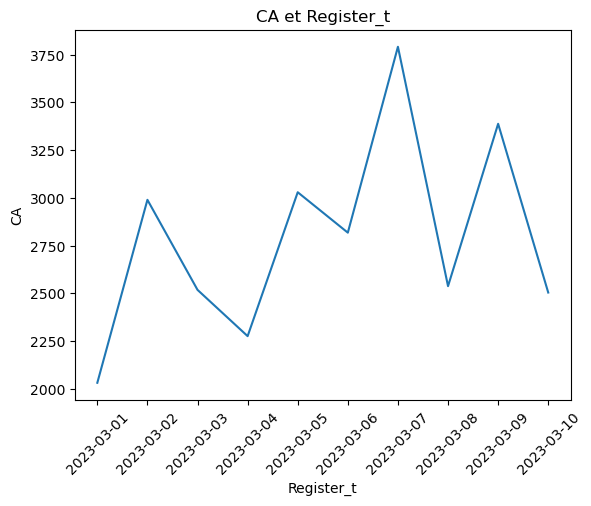

In [14]:
import numpy as np
import matplotlib.pyplot as plt


register_t = np.array(['2023-03-01', '2023-03-02', '2023-03-03', '2023-03-04', '2023-03-05', '2023-03-06', '2023-03-07', '2023-03-08', '2023-03-09', '2023-03-10'])
ca = np.array([2032.000000, 2990.111111, 2518.545455, 2276.272727, 3029.750000, 2818.111111, 3791.500000, 2538.000000, 3388.166667, 2504.545455])


fig, ax = plt.subplots()

ax.plot(register_t, ca)

ax.set_title('CA et Register_t')
ax.set_xlabel('Register_t')
ax.set_ylabel('CA')


plt.xticks(rotation=45)
plt.show()


Comme vous pouvez le voir sur le graphique, il y a eu une augmentation globale. 
Je pense qu'elle a obtenu l'effet escompté.

# Question 3 : Classification non supervisée
Pour confirmer votre intuition, vous décidez de mener une classification non supervisée sur
le jeu de données.
1. Créez un nouveau jeu de données ne contenant que les colonnes ca et age.
2. Appliquez un algorithme du k-means sur ce nouveau jeu de données. Quel est le nombre
optimal de cluster ? Proposez une méthodologie mathématique et appliquez la pour
confirmer vos dires.
3. Afficher sur un graphique les dépenses des individus par rapport à leur âge en modifiant
les couleurs des individus en fonction de leur cluster. Qu’allez-vous répondre à Julie ?

In [8]:
df_ca_age = df[['ca', 'age']]
df_ca_age

,ca,age
0,1100,23
1,4583,38
2,6064,35
3,1331,24
4,5509,34
...,...,...
447,4924,35
448,3663,33
449,5902,37
450,4226,22


In [9]:
#Trouver le meilleur K
from sklearn.cluster import KMeans
# Liste des valeurs de k à tester
k_values = range(1, 10)

# Liste des inerties pour chaque valeur de k
inertias = []

# Calcul de l'inertie pour chaque valeur de k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_ca_age)
    inertias.append(kmeans.inertia_)

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


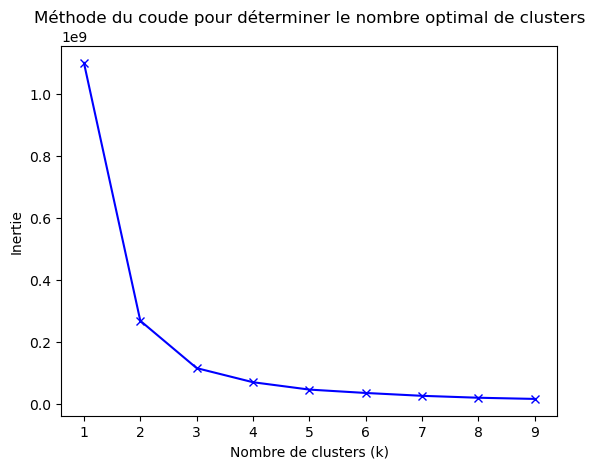

In [10]:
# Affichage de la courbe d'inertie en fonction de k
plt.plot(k_values, inertias, 'bx-')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.title('Méthode du coude pour déterminer le nombre optimal de clusters')
plt.show()

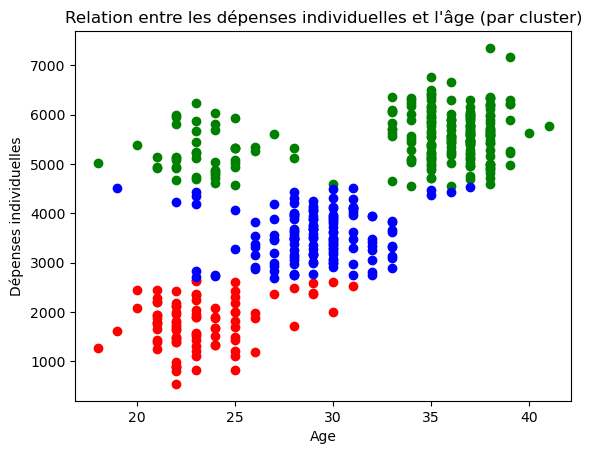

In [11]:
# K-means avec k=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_ca_age)

# Ajout d'une colonne 'cluster' au dataframe initial
df['cluster'] = kmeans.labels_

# Création du graphique avec points colorés diff
#rouge pour le cluster 0, vert pour le cluster 1, bleu pour le cluster 2
colors = ['r', 'g', 'b']
for i, color in zip(range(3), colors):
    cluster_df = df[df['cluster'] == i]
    plt.scatter(cluster_df['age'], cluster_df['ca'], color=color)
plt.xlabel('Age')
plt.ylabel('Dépenses individuelles')
plt.title('Relation entre les dépenses individuelles et l\'âge (par cluster)')
plt.show()

En observant le graphique, on peut voir qu'il y a effectivement une corrélation entre l'âge des individus et leurs dépenses.
Dans l'ensemble, les dépenses personnelles ont tendance à augmenter avec l'âge, mais il existe des différences entre les groupes.
On constate également qu'il existe trois groupes différents. En fonction de la densité des points, le groupe du milieu a une dépense moyenne plus élevée et correspond aux personnes âgées de 30 à 50 ans.
Donc, on peut confirmer que cette tranche d'âge est la plus intéressée par l'entreprise de Julie.